In [1]:
import sys
import os
sys.path.append(os.path.join(os.path.realpath('../'),'scripts'))
from method_comp import plot_hhg_method_comp

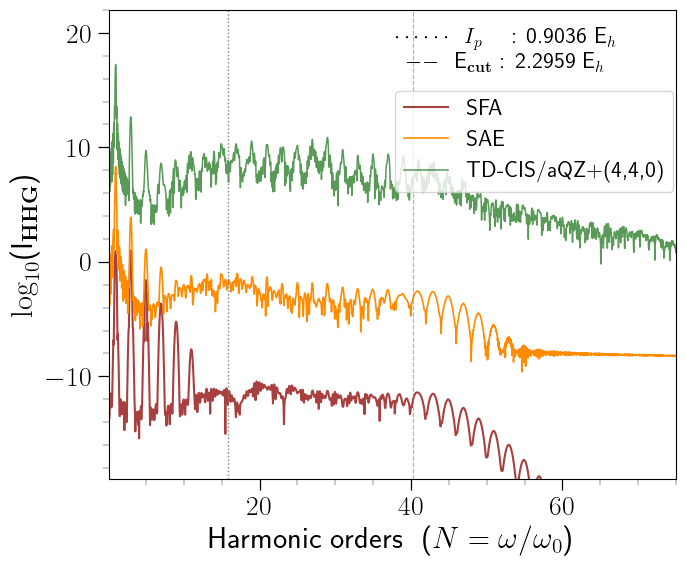

In [2]:
sae_path = '../data/qprop/helium_2E14/dat/' 
tdci_path = '../data/tdci/helium/he_aqz_440_cis_crt'
tdci_job = 'zs_2E14_54fs_800nm'
# sfa data
dipole_file = '../data/sfa/he_20cyc_800nm_2e14_npc400_dipole.txt'
spectrum_file = '../data/sfa/he_20cyc_800nm_2e14_npc400_spectrum.txt'

plot_hhg_method_comp(sae_path, tdci_path, tdci_job, spectrum_file, ylim=[-19,22], xlim=[0.1, 75], legend_pos=[0.75,.72], text_pos=[0.7, 0.89])

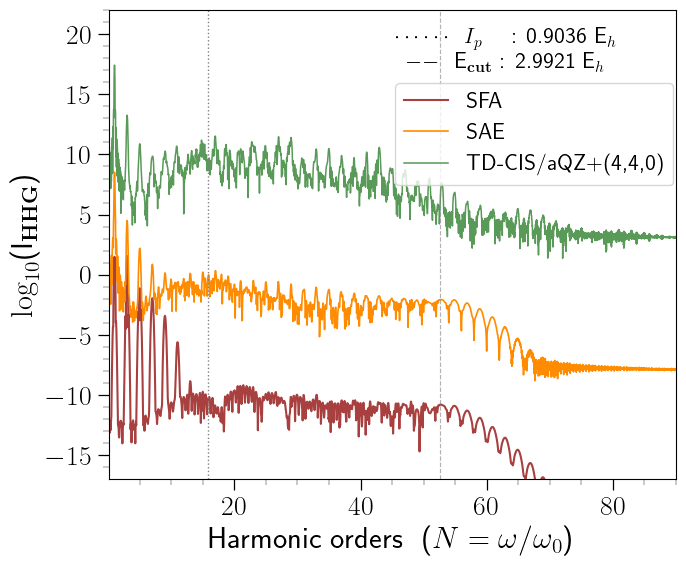

In [3]:
sae_path = '../data/qprop/helium_3E14/dat/' 
tdci_path = '../data/tdci/helium/he_aqz_440_cis_crt'
tdci_job = 'zs_3E14_54fs_800nm'
# sfa data
dipole_file = '../data/sfa/he_20cyc_800nm_3e14_npc400_dipole.txt'
spectrum_file = '../data/sfa/he_20cyc_800nm_3e14_npc400_spectrum.txt'

plot_hhg_method_comp(sae_path, tdci_path, tdci_job, spectrum_file, xlim=[0.1, 90], ylim=[-17,22], legend_pos=[0.75, 0.735], text_pos=[0.7, 0.89])

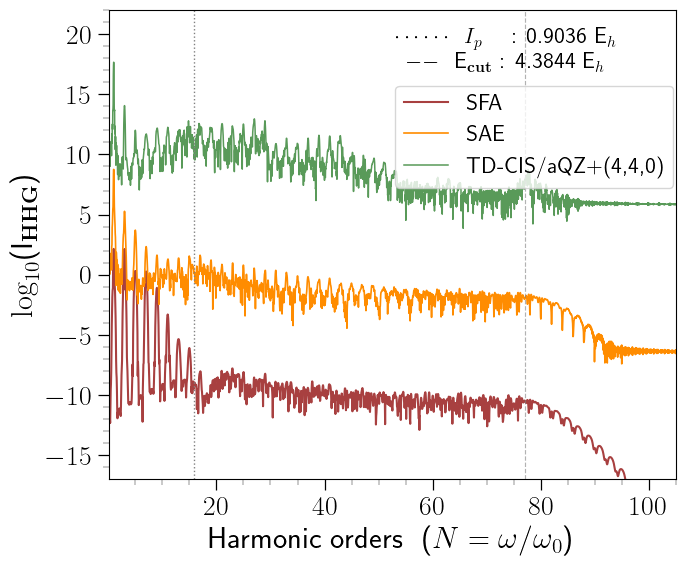

In [4]:
sae_path = '../data/qprop/helium_5E14/dat/' 
tdci_path = '../data/tdci/helium/he_aqz_440_cis_crt'
tdci_job = 'zs_5E14_54fs_800nm'
# sfa data
dipole_file = '../data/sfa/he_20cyc_800nm_5e14_npc400_dipole.txt'
spectrum_file = '../data/sfa/he_20cyc_800nm_5e14_npc400_spectrum.txt'
plot_hhg_method_comp(sae_path, tdci_path, tdci_job, spectrum_file, xlim=[0.1, 105], ylim=[-17,22], legend_pos=[0.75, .73], text_pos=[0.7, 0.89])